In [1]:
import sys
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
sys.executable

'/home/svmihar/anaconda3/envs/tensorf/bin/python'

In [2]:
df = pd.read_csv('datasets/banknotes.csv')
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [4]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [6]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


# optimizers

In [7]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [8]:
dflist = []

optimizers = ['SGD(lr=0.01)',
              'SGD(lr=0.01, momentum=0.3)',
              'SGD(lr=0.01, momentum=0.3, nesterov=True)',  
              'Adam(lr=0.01)',
              'Adagrad(lr=0.01)',
              'RMSprop(lr=0.01)']

for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=1)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

Epoch 1/5
960/960 [==============================] - 0s 306us/step - loss: 0.5463 - acc: 0.7375
Epoch 2/5
960/960 [==============================] - 0s 72us/step - loss: 0.4737 - acc: 0.8469
Epoch 3/5
960/960 [==============================] - 0s 81us/step - loss: 0.4267 - acc: 0.8917
Epoch 4/5
960/960 [==============================] - 0s 72us/step - loss: 0.3938 - acc: 0.9031
Epoch 5/5
960/960 [==============================] - 0s 74us/step - loss: 0.3694 - acc: 0.9062
Epoch 1/5
960/960 [==============================] - 0s 202us/step - loss: 0.4757 - acc: 0.8594
Epoch 2/5
960/960 [==============================] - 0s 77us/step - loss: 0.4159 - acc: 0.9167
Epoch 3/5
960/960 [==============================] - 0s 70us/step - loss: 0.3752 - acc: 0.9229
Epoch 4/5
960/960 [==============================] - 0s 76us/step - loss: 0.3457 - acc: 0.9229
Epoch 5/5
960/960 [==============================] - 0s 83us/step - loss: 0.3231 - acc: 0.9250
Epoch 1/5
960/960 [=============================

In [9]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

In [10]:

historydf.columns
idx

MultiIndex(levels=[['Adagrad(lr=0.01)', 'Adam(lr=0.01)', 'RMSprop(lr=0.01)', 'SGD(lr=0.01)', 'SGD(lr=0.01, momentum=0.3)', 'SGD(lr=0.01, momentum=0.3, nesterov=True)'], ['acc', 'loss']],
           labels=[[3, 3, 4, 4, 5, 5, 1, 1, 0, 0, 2, 2], [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]],
           names=['optimizers', 'metric'])

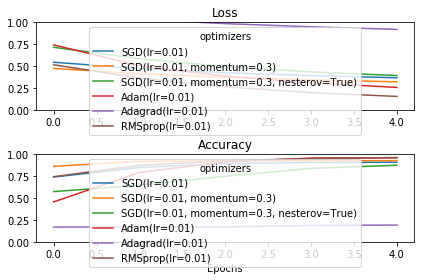

In [11]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title('Accuracy')

plt.xlabel('Epochs')
plt.tight_layout()

# initializer

In [12]:

dflist = []
initializers = ['zeros', 'uniform', 'normal', 'he_normal', 'lecun_uniform']

for init in initializers: 
    
    K.clear_session()
    model = Sequential()
    model.add(Dense(1, input_shape=(4,),
                  kernel_initializer = init,
                   activation = 'sigmoid'))
    model.compile(loss='binary_crossentropy',
                 optimizer='rmsprop',
                 metrics=['accuracy'])
    print(init)
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=1)
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

zeros
Epoch 1/5
960/960 [==============================] - 0s 223us/step - loss: 0.6705 - acc: 0.7833
Epoch 2/5
960/960 [==============================] - 0s 77us/step - loss: 0.6367 - acc: 0.7990
Epoch 3/5
960/960 [==============================] - 0s 75us/step - loss: 0.6073 - acc: 0.8063
Epoch 4/5
960/960 [==============================] - 0s 76us/step - loss: 0.5808 - acc: 0.8208
Epoch 5/5
960/960 [==============================] - 0s 69us/step - loss: 0.5559 - acc: 0.8281
uniform
Epoch 1/5
960/960 [==============================] - 0s 209us/step - loss: 0.6745 - acc: 0.7167
Epoch 2/5
960/960 [==============================] - 0s 76us/step - loss: 0.6401 - acc: 0.7938
Epoch 3/5
960/960 [==============================] - 0s 80us/step - loss: 0.6096 - acc: 0.8031
Epoch 4/5
960/960 [==============================] - 0s 75us/step - loss: 0.5823 - acc: 0.8250
Epoch 5/5
960/960 [==============================] - 0s 73us/step - loss: 0.5573 - acc: 0.8281
normal
Epoch 1/5
960/960 [========

In [13]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names=['initializers', 'metric'])

In [14]:
historydf.columns
idx

MultiIndex(levels=[['he_normal', 'lecun_uniform', 'normal', 'uniform', 'zeros'], ['acc', 'loss']],
           labels=[[4, 4, 3, 3, 2, 2, 0, 0, 1, 1], [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]],
           names=['initializers', 'metric'])

In [15]:
historydf.columns = idx

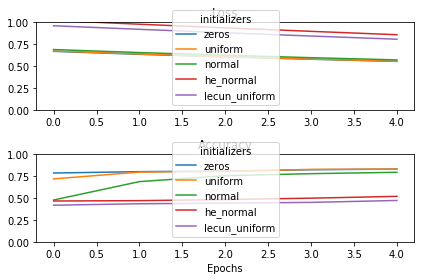

In [16]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

# Inner layer representation

In [17]:
K.clear_session()
model = Sequential()
model.add(Dense(2,
               input_shape = (4,), 
               activation = 'relu'))
model.add(Dense(1,
               activation='sigmoid'))
model.compile(loss='binary_crossentropy',
             optimizer = RMSprop(lr=0.01),
             metrics = ['accuracy'])

h = model.fit(X_train, y_train, 
             batch_size=16, 
             epochs = 20, 
             verbose=1, 
             validation_split=0.3)
result = model.evaluate(X_test, y_test)

Train on 672 samples, validate on 288 samples
Epoch 1/20
672/672 [==============================] - 0s 391us/step - loss: 0.6211 - acc: 0.5759 - val_loss: 0.5697 - val_acc: 0.6840
Epoch 2/20
672/672 [==============================] - 0s 85us/step - loss: 0.4640 - acc: 0.8199 - val_loss: 0.4186 - val_acc: 0.8924
Epoch 3/20
672/672 [==============================] - 0s 94us/step - loss: 0.3317 - acc: 0.9390 - val_loss: 0.3005 - val_acc: 0.9653
Epoch 4/20
672/672 [==============================] - 0s 85us/step - loss: 0.2383 - acc: 0.9717 - val_loss: 0.2148 - val_acc: 0.9792
Epoch 5/20
672/672 [==============================] - 0s 113us/step - loss: 0.1753 - acc: 0.9807 - val_loss: 0.1578 - val_acc: 0.9861
Epoch 6/20
672/672 [==============================] - 0s 95us/step - loss: 0.1349 - acc: 0.9762 - val_loss: 0.1222 - val_acc: 0.9861
Epoch 7/20
672/672 [==============================] - 0s 107us/step - loss: 0.1069 - acc: 0.9777 - val_loss: 0.0954 - val_acc: 0.9861
Epoch 8/20
672/672 [

In [18]:
result

[0.03257119343661278, 0.9878640776699029]

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.layers
inp = model.layers[0].input
out = model.layers[0].output

In [21]:
print(inp)
print(out)

Tensor("dense_1_input:0", shape=(?, 4), dtype=float32)
Tensor("dense_1/Relu:0", shape=(?, 2), dtype=float32)


In [22]:
features_function = K.function([inp],[out])

In [23]:
features_function([X_test])[0].shape

(412, 2)

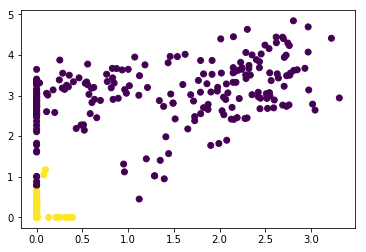

In [25]:
features = features_function([X_test])[0]
plt.scatter(features[:,0], features[:,1], c=y_test, cmap='viridis')

In [26]:
K.clear_session()
model = Sequential()
model.add(Dense(3, 
               input_shape=(4,),
               activation = 'relu'))
model.add(Dense(2, 
               activation='relu'))
model.add(Dense(1, 
               activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', 
             optimizer = RMSprop(lr=0.01), 
             metrics = ['accuracy'])

Epoch 1/1
412/412 [==============================] - 0s 26us/step
Epoch 1/1
412/412 [==============================] - 0s 34us/step
Epoch 1/1
412/412 [==============================] - 0s 30us/step
Epoch 1/1
412/412 [==============================] - 0s 27us/step
Epoch 1/1
412/412 [==============================] - 0s 28us/step
Epoch 1/1
412/412 [==============================] - 0s 30us/step
Epoch 1/1
412/412 [==============================] - 0s 37us/step
Epoch 1/1
412/412 [==============================] - 0s 28us/step
Epoch 1/1
412/412 [==============================] - 0s 57us/step
Epoch 1/1
412/412 [==============================] - 0s 28us/step
Epoch 1/1
412/412 [==============================] - 0s 36us/step
Epoch 1/1
412/412 [==============================] - 0s 40us/step
Epoch 1/1
412/412 [==============================] - 0s 35us/step
Epoch 1/1
412/412 [==============================] - 0s 29us/step
Epoch 1/1
412/412 [==============================] - 0s 49us/step
Epoch 1/1


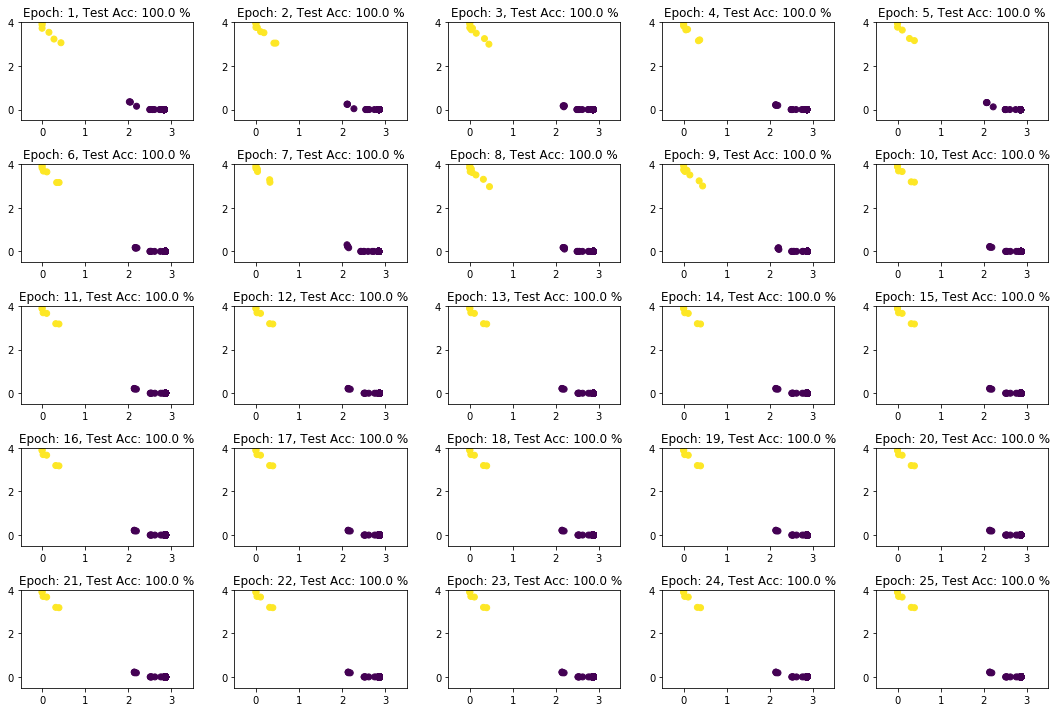

In [35]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp],[out])
plt.figure(figsize = (15,10))

for i in range(1,26): 
    plt.subplot(5,5,i)
    h = model.fit(X_train, y_train,batch_size = 16, epochs=1,verbose=1)
    test_accuracy = model.evaluate(X_test, y_test)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:,0], features[:,1], c=y_test, cmap='viridis')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))
plt.tight_layout()